# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as slm
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATASET

In [2]:
bank = pd.read_csv('bank-full.csv', delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# PERFORMIMG EXPLARATORY DATA ANALYSIS

## i) Getting Information of the Data

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## ii) Checking Null Values

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## iii) Checking for Duplicate Values

In [5]:
bank[bank.duplicated()]# there are no dduplicates

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


## iv) Getting Statistical Information

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#Calculating correlation values
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## v) Visualization

### Boxplots

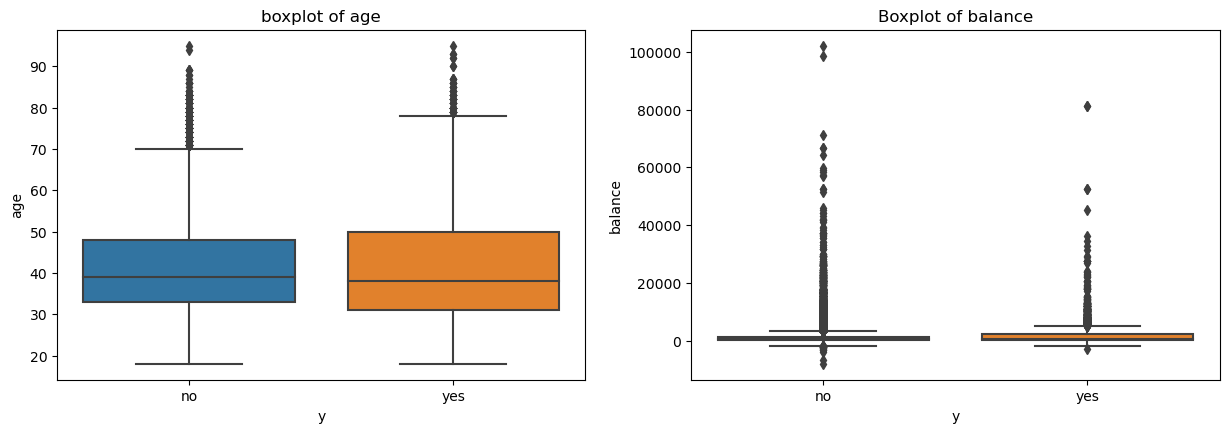

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(x="y",y="age",data=bank)  
plt.title('boxplot of age')
plt.subplot(222)
sns.boxplot(x='y',y='balance',data=bank)
plt.title('Boxplot of balance')
plt.show()

### Count Plots
**For Categorical and binary type of data**

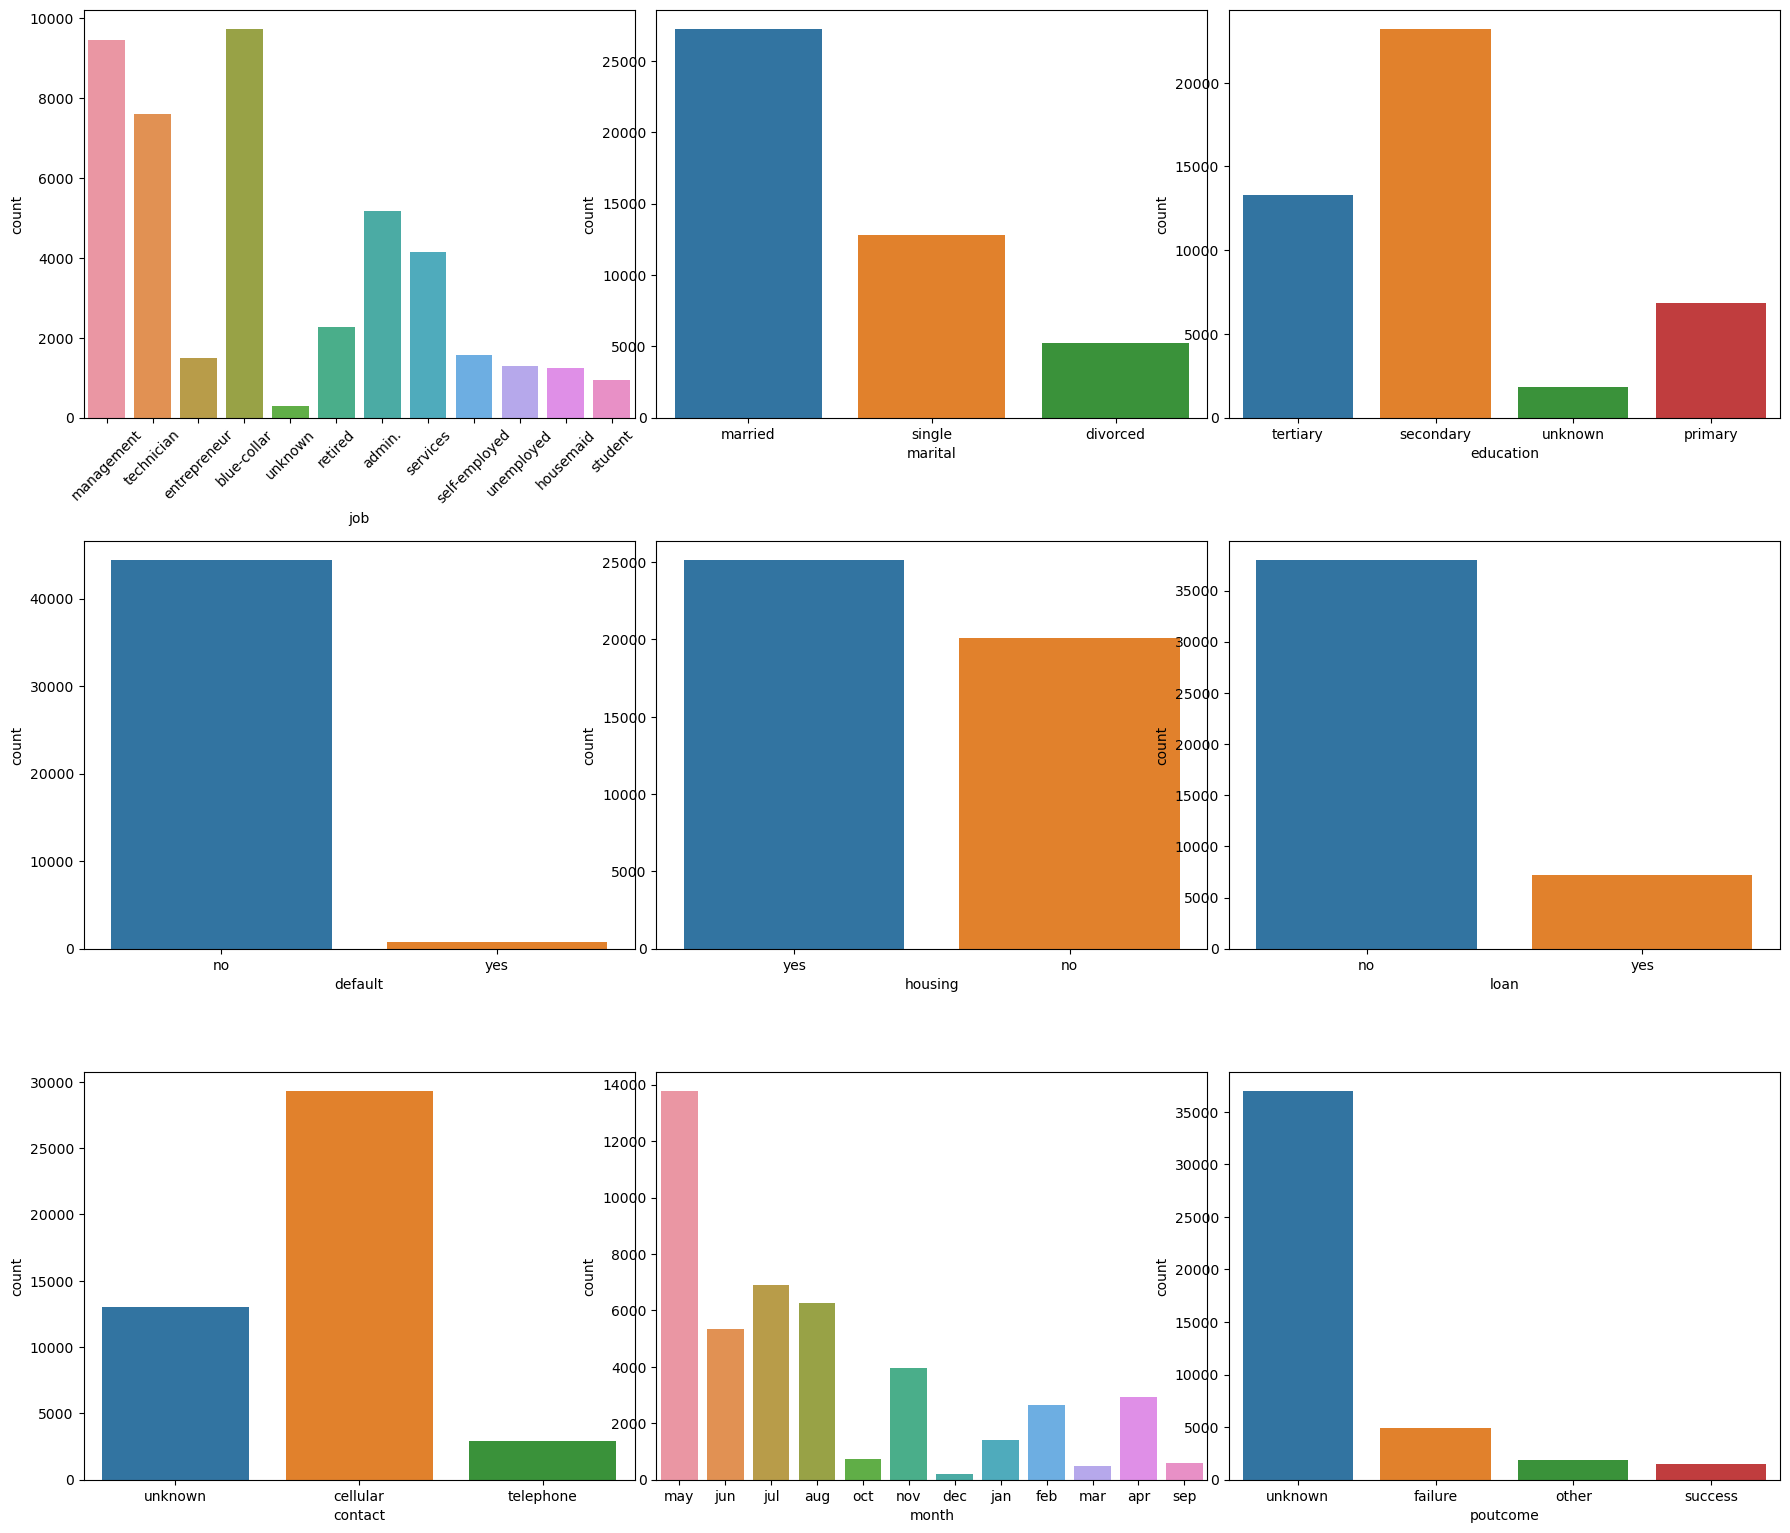

In [9]:
plt.figure(figsize=(18,15))
plt.subplot(331)
sns.countplot(x='job',data=bank).set_xticklabels(sns.countplot(x='job',data=bank).get_xticklabels(), rotation=45)
plt.tight_layout()
plt.subplot(332)
sns.countplot(x='marital',data=bank)
plt.subplot(333)
sns.countplot(x='education',data=bank)
plt.subplot(334)
sns.countplot(x='default',data=bank)
plt.subplot(335)
sns.countplot(x='housing',data=bank)
plt.subplot(336)
sns.countplot(x='loan',data=bank)
plt.subplot(337)
sns.countplot(x='contact',data=bank)
plt.subplot(338)
sns.countplot(x='month',data=bank)
plt.subplot(339)
sns.countplot(x='poutcome',data=bank)
plt.show()

## Data Transformation

**Hence we can see that the data has 'unknown' as values. Hence we have to perform one hot encoding in-order to avoid these missing values that are given as unknown**

In [10]:
cls=[c for c in bank.columns]
cls_uk=[]
for c in cls: 
    if 'unknown' in bank[c].values:
        cls_uk.append(c)
print('Columns having "Unknown" as values :',cls_uk)

Columns having "Unknown" as values : ['job', 'education', 'contact', 'poutcome']


In [11]:
#Unknown values count
for cl in cls_uk:
    print(cl,"-",bank[bank[cl].str.contains('unknown')][cl].count())

job - 288
education - 1857
contact - 13020
poutcome - 36959


### Performing One Hot Encoding on Categorical Variables

### Making various columns from  the columns that has unknown values

In [12]:
df=pd.get_dummies(bank,columns=['job', 'marital', 'education', 'contact', 'poutcome']) 
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [14]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


### Identify and replace Encoding for the categorical variables

In [15]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [16]:
#  doing MONTH variable to reduce the memory occupied
mo={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(mo)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

# MODEL BUIDING

In [18]:
#INPUT VARIBLES
X=pd.concat([df.iloc[:,0:11],df.iloc[:,12:]],axis=1)
#OUTPUT VARIABLES
Y=df.iloc[:,11]
#LOGISTIC REGRESSION
classifier=LogisticRegression().fit(X,Y)

In [19]:
#Calculating co-efficients of the features
classifier.coef_

array([[-2.64643721e-02, -1.93716463e-02,  2.63192805e-05,
        -7.73872654e-01, -2.10100163e-01, -3.52267284e-02,
         4.81243966e-02,  3.95243799e-03, -4.40982215e-01,
         2.85544341e-03,  6.39929667e-02, -2.67094381e-02,
        -2.95001874e-01, -2.96081438e-02, -8.84383520e-03,
         2.51650675e-02,  1.81047022e-01, -1.49196857e-02,
        -1.01393871e-01,  4.17265011e-02, -6.79033630e-02,
         8.46666587e-04,  2.92601402e-03,  1.27733892e-02,
        -1.92058154e-01, -1.13384175e-01, -8.80270505e-02,
        -2.97675314e-01,  7.83127704e-02,  1.47206548e-02,
         1.56159931e-01,  5.68967833e-02, -5.05725654e-01,
        -1.49102309e-01, -3.34643766e-02,  3.65470730e-01,
        -4.75572985e-01]])

# PREDICTNG PROBABILITIES

In [20]:
pr_pb=classifier.predict_proba(X)
pr_pb

array([[0.95086238, 0.04913762],
       [0.96991065, 0.03008935],
       [0.97655897, 0.02344103],
       ...,
       [0.25681161, 0.74318839],
       [0.94350394, 0.05649606],
       [0.46859288, 0.53140712]])

## Prediction Values (0 / 1)

In [21]:
Y_pred=classifier.predict(X)
Y_pred

array([0, 0, 0, ..., 1, 0, 1])

## Adding Probabilities to the Table

In [22]:
df1=pd.DataFrame(pr_pb[:,:])
new_Y=pd.concat([df,df1],axis=1)
new_Y

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,0,1
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0.950862,0.049138
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0.969911,0.030089
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.976559,0.023441
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0.976800,0.023200
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0.862925,0.137075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0.414713,0.585287
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0.816345,0.183655
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0.256812,0.743188
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.943504,0.056496


## Actual Values and Predicted Values

In [23]:
Y_pred_df=pd.DataFrame({'actual_y':Y,'y_pred_prob':Y_pred})
Y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# CONFUSION MATRIX

In [24]:
#import sklearn.metrics as slm
cm=slm.confusion_matrix(Y,Y_pred)
cm

array([[38953,   969],
       [ 3962,  1327]], dtype=int64)

In [25]:
pd.crosstab(Y_pred,Y) 

y,0,1
row_0,,
0,38953,3962
1,969,1327


### Calculating Accuracy

In [26]:
acc= sum(Y==Y_pred)/bank.shape[0]
acc

0.8909336223485435

In [27]:
print(slm.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.58      0.25      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.61      0.65     45211
weighted avg       0.87      0.89      0.87     45211



In [28]:
roc_sc=slm.roc_auc_score(Y,Y_pred)
roc_sc

0.6133128796653569

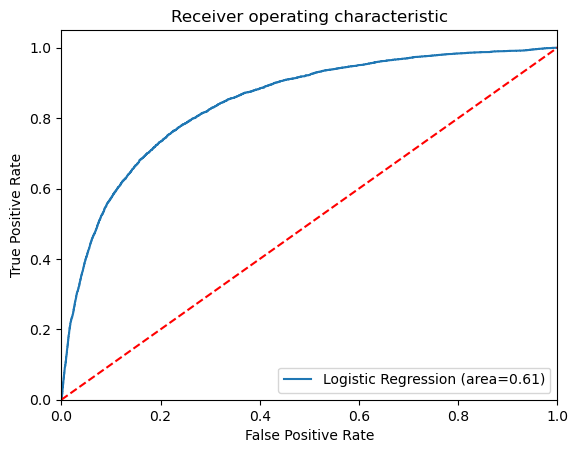

In [29]:
fpr, tpr, thresholds = slm.roc_curve(Y,pr_pb[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_sc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [30]:
y_prob1 = pd.DataFrame(pr_pb[:,1]) 
y_prob1

,0
0,0.049138
1,0.030089
2,0.023441
3,0.023200
4,0.137075
...,...
45206,0.585287
45207,0.183655
45208,0.743188
45209,0.056496


In [31]:
lo= sm.Logit(Y,X).fit().summary()
lo

         Current function value: 0.249853
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45178
Method:                           MLE   Df Model:                           32
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                  0.3076
Time:                        15:12:14   Log-Likelihood:                -11296.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0017      0.002      0.801      0.423      -0.002       0.006
default                -0.1558      0.162     -0.964      0.335      -0.472       0.161
balance              1.854e-05   4.86e-06      3.812      0.000    9.01e-06    2.81e-05
housing                -0.7788      0.040    -19.608      0.000      -0.857      -0.701
loan                   -0.5603      0.058     -9.625      0.000      -0.674      -0.446
day                    -0.0042      0.002     -1.954      0.051      -0.008    1.17e-05
month                  -0.0185      0.007     -2.761      0.006      -0.032      -0.005
duration                0.0041   6.28e-05     64.591      0.000       0.004       0.004
campaign               -0.1061      0.010    -10.651      0.000      -0.126      -0.087
pdays                   0.0001      0.000      0.401      0.688      -0.000       0.001
previous                0.0102      0.007      1.561      0.118      -0.003       0.023
job_admin.              0.0435   3.11e+06    1.4e-08      1.000   -6.09e+06    6.09e+06
job_blue-collar        -0.3517   3.43e+06  -1.03e-07      1.000   -6.72e+06    6.72e+06
job_entrepreneur       -0.4373   3.43e+06  -1.27e-07      1.000   -6.72e+06    6.72e+06
job_housemaid          -0.4748   3.14e+06  -1.51e-07      1.000   -6.16e+06    6.16e+06
job_management         -0.1781   3.43e+06  -5.19e-08      1.000   -6.72e+06    6.72e+06
job_retired             0.3822   3.18e+06    1.2e-07      1.000   -6.24e+06    6.24e+06
job_self-employed      -0.3294   3.21e+06  -1.03e-07      1.000    -6.3e+06     6.3e+06
job_services           -0.2698   3.14e+06  -8.59e-08      1.000   -6.16e+06    6.16e+06
job_student             0.5482   3.21e+06   1.71e-07      1.000    -6.3e+06     6.3e+06
job_technician         -0.2224   3.11e+06  -7.16e-08      1.000   -6.09e+06    6.09e+06
job_unemployed         -0.1914   3.14e+06  -6.09e-08      1.000   -6.16e+06    6.16e+06
job_unknown            -0.2970   2.99e+06  -9.92e-08      1.000   -5.87e+06    5.87e+06
marital_divorced       -0.5919        nan        nan        nan         nan         nan
marital_married        -0.7495        nan        nan        nan         nan         nan
marital_single         -0.4366        nan        nan        nan         nan         nan
education_primary      -0.6548   3.76e+06  -1.74e-07      1.000   -7.37e+06    7.37e+06
education_secondary    -0.4883   3.79e+06  -1.29e-07      1.000   -7.44e+06    7.44e+06
education_tertiary     -0.2507   3.78e+06  -6.63e-08      1.000   -7.41e+06    7.41e+06
education_unknown      -0.3842   3.76e+06  -1.02e-07      1.000   -7.37e+06    7.37e+06
contact_cellular       -0.1730        nan        nan        nan         nan         nan
contact_telephone      -0.2577        nan        nan        nan         nan         nan
contact_unknown        -1.3474        nan        nan        nan         nan         nan
poutcome_failure       -1.0211        nan        nan        nan         n

**Hence we can see that there are few columns whose p-values are >0.05. This indicates that the data present in those columns do not have any significant affect on the regression model.**

**Hence, we can exclude those columns while developing the model**

## Re-Building The Model By excluding unaffected columns

In [32]:
#INPUT VARIBLES
X1=pd.concat([df.iloc[:,[2,3,4,6,7,8]],df.iloc[:,[24,25,26,31,32,33,34,35,36,37]]],axis=1)
#OUTPUT VARIABLES
Y1=df.iloc[:,11]
#LOGISTIC REGRESSION
classifier1=LogisticRegression().fit(X1,Y1)

In [33]:
#Calculating co-efficients of the features
classifier1.coef_

array([[ 2.10816994e-05, -9.73546351e-01, -6.06236094e-01,
        -1.82846860e-02,  4.03770174e-03, -1.14215098e-01,
        -3.74891579e-01, -3.86466085e-01, -2.87083495e-01,
         8.60429756e-02, -1.00781332e-02, -1.12440600e+00,
        -7.91664627e-01, -2.57672943e-01,  1.25185162e+00,
        -1.25095521e+00]])

# PREDICTING PROBABILITIES

In [34]:
pr_pb1=classifier1.predict_proba(X1)
pr_pb1

array([[0.9800167 , 0.0199833 ],
       [0.9863733 , 0.0136267 ],
       [0.99498862, 0.00501138],
       ...,
       [0.02189167, 0.97810833],
       [0.78430544, 0.21569456],
       [0.62670165, 0.37329835]])

# PREDICTING VALUES

In [35]:
Y1_pred=classifier1.predict(X1)
Y1_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
df2=pd.DataFrame(pr_pb1[:,:])
new_Y1=pd.concat([df,df2],axis=1)
new_Y1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,0,1
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0.980017,0.019983
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0.986373,0.013627
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.994989,0.005011
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0.989934,0.010066
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0.957681,0.042319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0.306530,0.693470
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0.758120,0.241880
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0.021892,0.978108
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.784305,0.215695


## Comparing the actual values with the predicted vaalues of both the models

In [37]:
Y1_pred_df=pd.DataFrame({'actual_y':Y,'y_pred_m1':Y_pred,'y_pred_m2':Y1_pred})
Y1_pred_df

,actual_y,y_pred_m1,y_pred_m2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
45206,1,1,1
45207,1,0,0
45208,1,1,1
45209,0,0,0


In [38]:
#import sklearn.metrics as slm
cm1=slm.confusion_matrix(Y1,Y1_pred)
cm1

array([[38997,   925],
       [ 3633,  1656]], dtype=int64)

In [39]:
pd.crosstab(Y1_pred,Y1) 

y,0,1
row_0,,
0,38997,3633
1,925,1656


## CALCULATING ACCURACY

In [40]:
acc1= sum(Y1==Y1_pred)/bank.shape[0]
acc1

0.8991838269447701

In [41]:
print(slm.classification_report(Y1,Y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.64      0.31      0.42      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.64      0.68     45211
weighted avg       0.88      0.90      0.88     45211



# ROC-CURVE

In [42]:
roc_sc1=slm.roc_auc_score(Y1,Y1_pred)
roc_sc1

0.6449662420278817

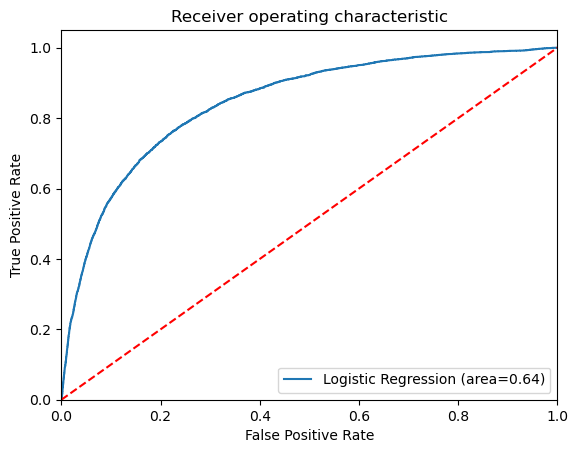

In [43]:
fpr1, tpr1, thresholds1 = slm.roc_curve(Y1,pr_pb1[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_sc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

**Model1: model before excluding the columns whose p-values>0.05**

**Model2: model after excluding the columns whose p-values>0.05**

In [44]:
#Accuracy & AUC comparision of model before removing unaffected columns and after removing unaffected columns
comp = {"MODEL":pd.Series(["Model1","Model2"]),
        "Accuracy":pd.Series([acc,acc1]),
        "Area Under Curve":pd.Series([roc_sc,roc_sc1])}
t=pd.DataFrame(comp)
t 

,MODEL,Accuracy,Area Under Curve
0,Model1,0.890934,0.613313
1,Model2,0.899184,0.644966


### Hence we can see the improvement in the logistic regression model after removing the unaffected columns

In [45]:
lo1= sm.Logit(Y1,X1).fit().summary()
lo1

Optimization terminated successfully.
         Current function value: 0.252543
         Iterations 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                  0.3002
Time:                        15:12:17   Log-Likelihood:                -11418.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
balance            2.262e-05   4.75e-06      4.767      0.000    1.33e-05    3.19e-05
housing              -0.8813      0.038    -23.440      0.000      -0.955      -0.808
loan                 -0.6170      0.058    -10.702      0.000      -0.730      -0.504
month                -0.0182      0.007     -2.763      0.006      -0.031      -0.005
duration              0.0040   6.21e-05     64.622      0.000       0.004       0.004
campaign             -0.1119      0.010    -11.333      0.000      -0.131      -0.093
marital_divorced     -0.7351        nan        nan        nan         nan         nan
marital_married      -0.9386        nan        nan        nan         nan         nan
marital_single       -0.5591        nan        nan        nan         nan         nan
contact_cellular     -0.3300        nan        nan        nan         nan         nan
contact_telephone    -0.3585        nan        nan        nan         nan         nan
contact_unknown      -1.5442        nan        nan        nan         nan         nan
poutcome_failure     -1.1219        nan        nan        nan         nan         nan
poutcome_other       -0.8636        nan        nan        nan         nan         nan
poutcome_success      1.2111        nan        nan        nan         nan         nan
poutcome_unknown     -1.4583        nan        nan        nan         nan         nan
=====================================================================================
"""